In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
x = np.load('X.npy')
y = np.load('Y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train[0]

array([[0.49019608, 0.49803922, 0.50980395, ..., 0.50980395, 0.49803922,
        0.4862745 ],
       [0.49803922, 0.5058824 , 0.52156866, ..., 0.5176471 , 0.5058824 ,
        0.49411765],
       [0.5019608 , 0.5137255 , 0.5254902 , ..., 0.5294118 , 0.5137255 ,
        0.5019608 ],
       ...,
       [0.50980395, 0.5254902 , 0.53333336, ..., 0.5058824 , 0.49411765,
        0.4862745 ],
       [0.5058824 , 0.5137255 , 0.5254902 , ..., 0.5019608 , 0.49411765,
        0.48235294],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.49019608, 0.4862745 ,
        0.4745098 ]], dtype=float32)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1649, 64, 64)
(1649, 10)
(413, 64, 64)
(413, 10)


In [ ]:
# x_train=x_train/255
# x_test=x_test/255

In [ ]:
x_train=x_train.reshape(1649,64,64,1)
x_test=x_test.reshape(413,64,64,1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1649, 64, 64, 1)
(1649, 10)
(413, 64, 64, 1)
(413, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
m1=Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(64,64,1)))
m1.add(MaxPooling2D(pool_size=(3,3)))
m1.add(Conv2D(128,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))
m1.add(Flatten())
m1.add(Dense(64,activation='relu'))
m1.add(Dense(10,activation='softmax'))

In [ ]:
m1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h1=m1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
52/52 [==============================] - 27s 235ms/step - loss: 2.2816 - accuracy: 0.1971 - val_loss: 2.1816 - val_accuracy: 0.2010
Epoch 2/10
52/52 [==============================] - 12s 228ms/step - loss: 1.5266 - accuracy: 0.5130 - val_loss: 1.1157 - val_accuracy: 0.6223
Epoch 3/10
52/52 [==============================] - 11s 208ms/step - loss: 0.8170 - accuracy: 0.7307 - val_loss: 0.8463 - val_accuracy: 0.7167
Epoch 4/10
52/52 [==============================] - 11s 214ms/step - loss: 0.6392 - accuracy: 0.7829 - val_loss: 0.6452 - val_accuracy: 0.7942
Epoch 5/10
52/52 [==============================] - 11s 210ms/step - loss: 0.5325 - accuracy: 0.8278 - val_loss: 0.6311 - val_accuracy: 0.7990
Epoch 6/10
52/52 [==============================] - 11s 210ms/step - loss: 0.4704 - accuracy: 0.8435 - val_loss: 0.6240 - val_accuracy: 0.7918
Epoch 7/10
52/52 [==============================] - 11s 214ms/step - loss: 0.4193 - accuracy: 0.8575 - val_loss: 0.5397 - val_accuracy: 0.8426

In [ ]:
res=pd.DataFrame(h1.history)
res['Epochs']=h1.epoch
res.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
5,0.470412,0.843542,0.623993,0.791768,5
6,0.419287,0.857489,0.539699,0.842615,6
7,0.365806,0.882959,0.532516,0.835351,7
8,0.317203,0.896301,0.580693,0.825666,8
9,0.267467,0.918132,0.478866,0.864407,9


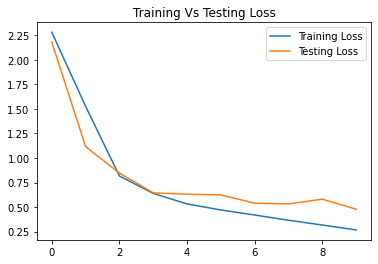

In [ ]:
plt.plot(res['Epochs'],res['loss'],label='Training Loss')
plt.plot(res['Epochs'],res['val_loss'],label='Testing Loss')
plt.title('Training Vs Testing Loss')
plt.legend()
plt.show()

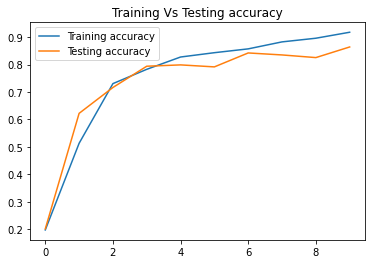

In [ ]:
plt.plot(res['Epochs'],res['accuracy'],label='Training accuracy')
plt.plot(res['Epochs'],res['val_accuracy'],label='Testing accuracy')
plt.title('Training Vs Testing accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred=m1.predict(x_test)
y_pred[:10]

array([[6.61156185e-10, 2.53136735e-03, 1.01820531e-03, 7.46161095e-05,
        1.70450646e-03, 5.12119300e-07, 1.62014203e-06, 3.97059252e-04,
        9.94272113e-01, 1.14342678e-08],
       [6.86454150e-05, 2.24566134e-06, 1.41863381e-06, 3.16597486e-08,
        5.15813753e-03, 1.14214583e-06, 4.38507630e-09, 9.94572341e-01,
        4.17294796e-05, 1.54256559e-04],
       [9.62878585e-01, 2.06685993e-08, 1.37992347e-05, 1.15956834e-06,
        1.56343951e-08, 1.09524503e-02, 2.62443227e-05, 1.37727820e-05,
        5.38064171e-09, 2.61140000e-02],
       [7.89373298e-04, 6.98374561e-06, 8.79405066e-02, 3.06366030e-02,
        5.12094948e-06, 2.59314068e-02, 8.53293121e-01, 2.17204815e-05,
        5.12986036e-04, 8.62054760e-04],
       [8.92465591e-01, 5.48232174e-06, 3.74719093e-05, 8.65699633e-07,
        2.24103715e-07, 9.09362957e-02, 6.08359078e-05, 1.63907916e-05,
        1.40346756e-07, 1.64766815e-02],
       [5.67001825e-06, 7.87420198e-02, 5.48412837e-03, 5.60669228e-04,
   

In [ ]:
y_pred=[np.argmax(i) for i in y_pred]
y_pred[:10]

[8, 7, 0, 6, 0, 8, 0, 5, 9, 5]

In [ ]:
y_test1=[np.argmax(i) for i in y_test]
y_test1[:10]

[8, 7, 0, 6, 0, 7, 0, 5, 9, 5]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_pred,y_test1))
print(classification_report(y_pred,y_test1))

[[58  1  0  0  0  1  0  1  0  0]
 [ 0 31  0  0  2  0  1  0  0  0]
 [ 0  0 32  0  1  0  1  0  2  0]
 [ 0  2  1 31  0  0  1  0  1  0]
 [ 1  0  0  0 29  0  0  0  1  0]
 [ 2  1  3  1  2 39  4  0  0  0]
 [ 0  0  2  2  0  0 34  0  0  0]
 [ 2  0  0  0  0  0  0 38  0  1]
 [ 0  0  3  8  3  2  0  1 28  0]
 [ 1  0  0  0  0  0  0  1  0 37]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        61
           1       0.89      0.91      0.90        34
           2       0.78      0.89      0.83        36
           3       0.74      0.86      0.79        36
           4       0.78      0.94      0.85        31
           5       0.93      0.75      0.83        52
           6       0.83      0.89      0.86        38
           7       0.93      0.93      0.93        41
           8       0.88      0.62      0.73        45
           9       0.97      0.95      0.96        39

    accuracy                           0.86       413
   macro avg       